# Part 1 - Exploratory Data Analysis and Preparation

In [1]:
#1. Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models

In [2]:
df = pd.read_csv("lithium-ion-batteries.csv")

In [3]:
df.shape

(339, 11)

In [4]:
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [5]:
df["Spacegroup"].value_counts()

P1         72
P21/c      32
Pc         27
P21        23
Cc         16
C2/c       15
C2         12
Pna21      12
Pcmn        8
P21nb       8
Pnma        8
C2/m        6
C2221       6
Fdd2        6
Pbn21       6
C2cm        6
Pbca        6
Cmce        6
Pc21n       6
P212121     6
Pb21a       5
Pbnm        4
Pmnb        4
C222        3
P21nm       3
Pca21       3
Cmcm        3
P2/m        3
Imma        2
F2dd        2
P2          2
Pmn21       2
Pnca        2
Pm21n       2
P21/m       2
Pn21a       2
P21cn       1
P2/c        1
Ibmm        1
Pnc2        1
Icma        1
Pmc21       1
Imcm        1
Ccme        1
Name: Spacegroup, dtype: int64

In [6]:
df["Crystal System"].value_counts()

monoclinic      139
orthorhombic    128
triclinic        72
Name: Crystal System, dtype: int64

In [7]:
print(df.columns.tolist())

['Materials Id', 'Formula', 'Spacegroup', 'Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume', 'Has Bandstructure', 'Crystal System']


In [8]:
#2. Spacegroup is not balanced as the highest value is 72 compared to a low value of 1.
# Crystal System is a little more balanced, but it may benefit from using the SMOTE function.

In [9]:
#3. LabelEncoder and drop Materials Id
df.drop(["Materials Id"], axis = 1)

# We use labelEncoder because over OneHotEncoder because it can handle categorical data which is what Spacegroup and Crystal System are.

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...
334,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [10]:
encoder = LabelEncoder()
df["Spacegroup","Crystal System"] = encoder.fit_transform(df["Spacegroup","Crystal System"])
y = df[ "Spacegroup","Crystal System"]

KeyError: ('Spacegroup', 'Crystal System')

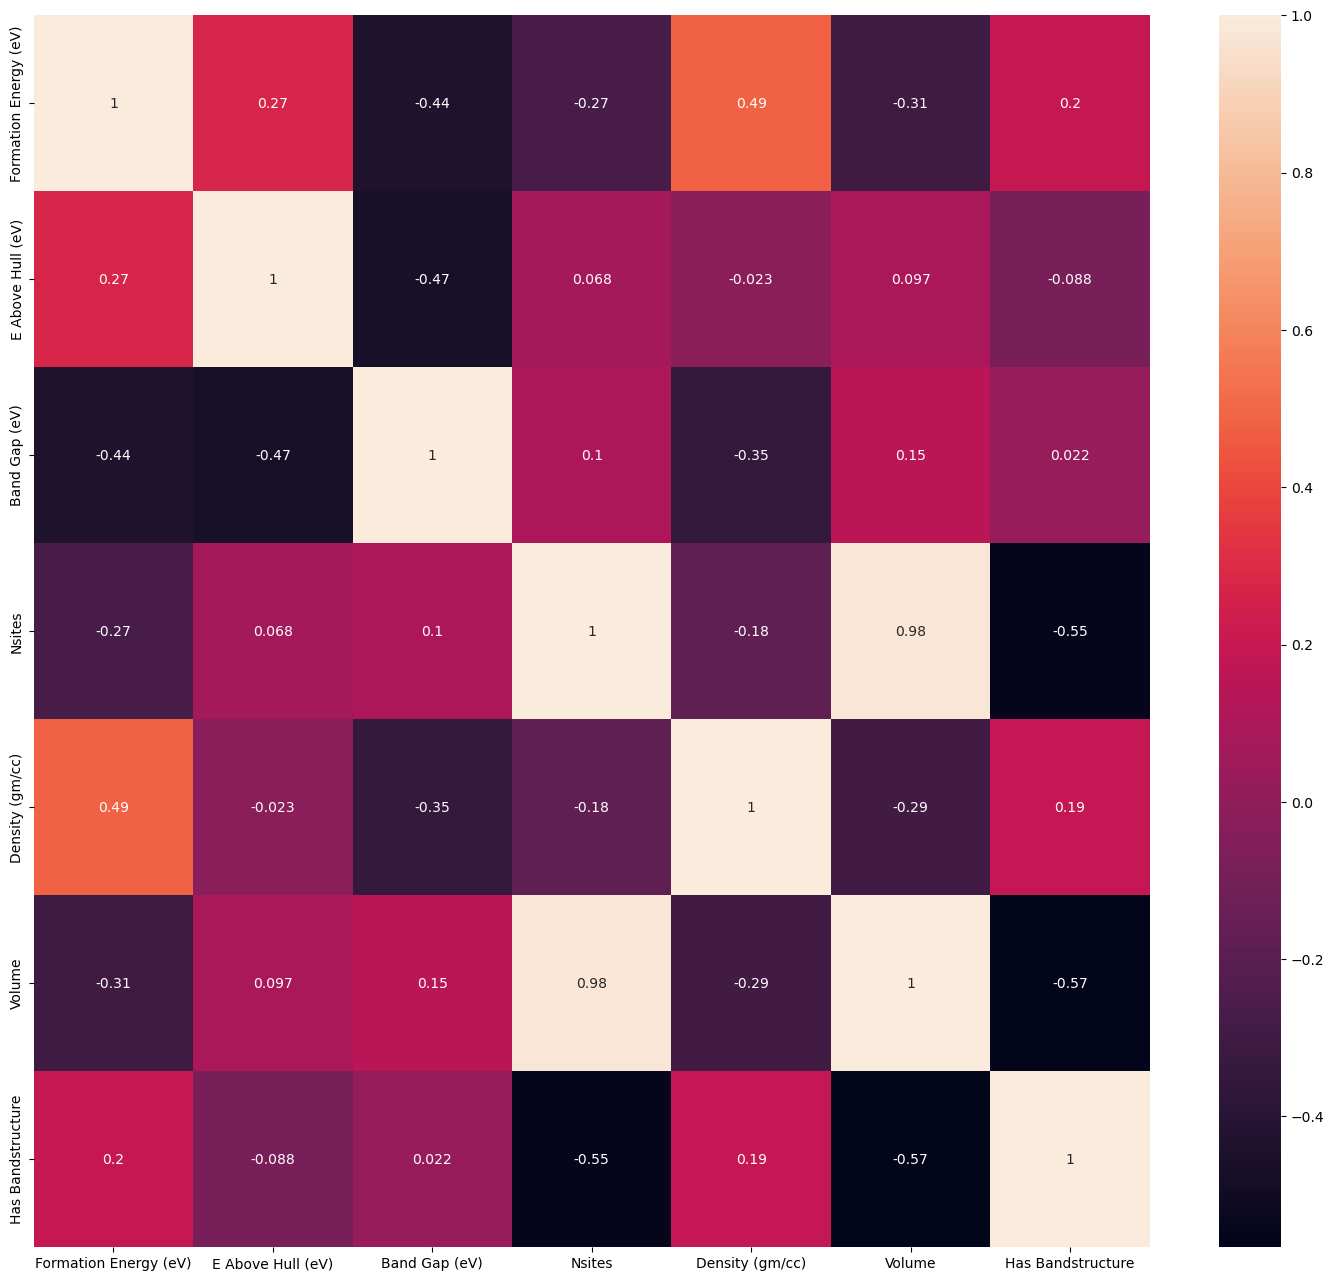

In [11]:
#4. Heat map
fig = plt.figure(figsize = (18,16))
sns.heatmap(df.corr(), annot = True)
plt.show()
# Most of the features are not correlated with one another with one exception.

# Part 2 - Classification Models

In [18]:
#1. Assign x inputs and 2 y outputs
x = df.drop(["Materials Id", "Formula", "Crystal System", "Spacegroup"], axis = 1)
y = df["Crystal System"]
y2 = df["Spacegroup"]

In [19]:
#2a. Scale, train RFC with a 20% split and predict y1 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
rf = RandomForestClassifier(n_estimators = 400)
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test, y_pred_rf)
print(results)

1.0
0.6470588235294118
[[21  4  3]
 [ 8 18  0]
 [ 6  3  5]]
              precision    recall  f1-score   support

  monoclinic       0.60      0.75      0.67        28
orthorhombic       0.72      0.69      0.71        26
   triclinic       0.62      0.36      0.45        14

    accuracy                           0.65        68
   macro avg       0.65      0.60      0.61        68
weighted avg       0.65      0.65      0.64        68



In [21]:
#2b. Spacegroup

x_train, x_test, y_train, y_test = train_test_split(x, y2, test_size = 0.2)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
rf = RandomForestClassifier(n_estimators = 400)
rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test, y_pred_rf)
print(results)

1.0
0.35294117647058826
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

          C2       0.00      0.00      0.00         2
        C2/c       0.00      0.00      0.00         2
        C2/m       1.00      1.00      1.00         1
       C2221       0.00      0.00      0.00         1
        C2cm       1.00      1.00      1.00         1
          Cc       0.00      0.00      0.00         3
        Cmce       0.25      1.00      0.40         1
        Cmcm       1.00      1.00      1.00         1
        Fdd2       1.00      1.00      1.00         1
        Icma       0.00      0.00      0.00         1
          P1       0.50      0.73      0.59        15
          P2       0.00      0.00      0.00         2
        P2/m       0.00      0.00      0.00         1
         P21       0.00      0.00      0.00         1
       P21/c       0.43      0.38      0.40  

C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usama\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [23]:
# The "Crystal System" performed better than 'Spacegroup' possibly because it was better balanced and only had three types of classifications.

In [24]:
#3. Import Tensor Flow and other functions

In [41]:
#3a. Sequential Model Crystal System
x_train = x_train.astype("float32") / 255  # scales data between 0 and 1
x_test = x_test.astype("float32") / 255  # scales data between 0 and 1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

model = models.Sequential()
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(512,  activation = 'relu'))
model.add(layers.Dense(256,  activation = 'relu'))
model.add(layers.Dense(128,  activation = 'relu'))
model.add(layers.Dense(3,    activation = 'softmax')) 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=300)

pred = model.predict(x_test)
val_loss, val_acc = model.evaluate(x_test, y_test)  
print(val_loss)
print(val_acc)

Epoch 1/300


UnimplementedError: Graph execution error:

Detected at node 'Cast_31' defined at (most recent call last):
    File "C:\Users\Usama\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Usama\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Usama\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Usama\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Usama\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Usama\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Usama\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Usama\AppData\Local\Temp\ipykernel_9680\1337024053.py", line 1, in <module>
      model.fit(x_train, y_train, epochs=300)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_31'
Cast string to float is not supported
	 [[{{node Cast_31}}]] [Op:__inference_train_function_7225]

In [32]:
#3b. Sequential Model for Spacegroup
x_train = x_train.astype("float32") / 255  # scales data between 0 and 1
x_test = x_test.astype("float32") / 255  # scales data between 0 and 1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

model1 = models.Sequential()
model1.add(layers.Dense(1024, activation = 'relu'))
model1.add(layers.Dense(512,  activation = 'relu'))
model1.add(layers.Dense(256,  activation = 'relu'))
model1.add(layers.Dense(128,  activation = 'relu'))
model1.add(layers.Dense(44,   activation = 'softmax')) 

model1.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [34]:
model1.fit(x_train, y_train, epochs=300)

pred = model1.predict(x_test)
val_loss, val_acc = model1.evaluate(x_test, y_test)  
print(val_loss)
print(val_acc)

Epoch 1/300


UnimplementedError: Graph execution error:

Detected at node 'Cast_31' defined at (most recent call last):
    File "C:\Users\Usama\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Usama\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Usama\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Usama\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Usama\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Usama\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Usama\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Usama\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Usama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Usama\AppData\Local\Temp\ipykernel_9680\3482147760.py", line 1, in <module>
      model1.fit(x_train, y_train, epochs=300)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\Usama\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_31'
Cast string to float is not supported
	 [[{{node Cast_31}}]] [Op:__inference_train_function_3679]

In [ ]:
# There was an error that I could not resolve: UnimplementedError: Graph execution error:
# With each passing epoch, the accuracy should increase for each of the predictions.
# I would assume both predictive models would get relatively close to a perfect accuracy score as that is the point of using Sequential models.
# If anything then Crystal System should have a slightly better score as it was more balanced out of the two
# We chose 500 epochs for Spacegroup due to it being extremely unbalanced.

In [ ]:
#4. The RFC did a lot better prediction for Crystal System than Spacegroups
# Sequential model would predict a lot better for Spacegropup as it has a higher epochs value and would run for a lot longer.
# Balanced data is important when implementing RFC while it would not matter so much for Sequential models.